In [1]:
import json

import rclpy
from rclpy.node import Node

from nimbro_utils.imports_lazy import start_and_spin_node
from vlm_gist.imports_lazy import Baseline, test_image_path

In [2]:
class BaselineNode(Node):
    def __init__(self, context=None):
        super().__init__("baseline_node", context=context)
        self.baseline = Baseline(self, logger_severity=20)

In [3]:
node, executor, context, thread = start_and_spin_node(BaselineNode, blocking=False)

In [4]:
images = [test_image_path]
# images = ["https://upload.wikimedia.org/wikipedia/commons/4/46/Table.JPG", "https://upload.wikimedia.org/wikipedia/commons/1/12/Universit%C3%A4t_Bonn.jpg"]

success, message, labels, bboxes, masks, track_ids, metadata = node.baseline.get(
    images=images,
    settings={'crop_masks': False}
)

2025-09-04 16:35:03.987 [INFO] [baseline_node.baseline]: Processing image '1' of '1' (/home/paetzoldb0/ws/jazzy/main/src/vlm_gist/data/baselines/baseline_edits/2025_09_04_16_35_03_509.png)
2025-09-04 16:35:07.425 [INFO] [baseline_node.baseline]: Detected '9' objects
2025-09-04 16:35:08.896 [INFO] [baseline_node.baseline]: Segmented '9' detections
2025-09-04 16:35:10.178 [INFO] [baseline_node.baseline]: Tracked '9' detections
2025-09-04 16:35:11.497 [INFO] [baseline_node.baseline]: Successfully processed '1' image.


/home/paetzoldb0/ws/jazzy/main/src/vlm_gist/datasets/vlm_gist/data/00009.jpg:


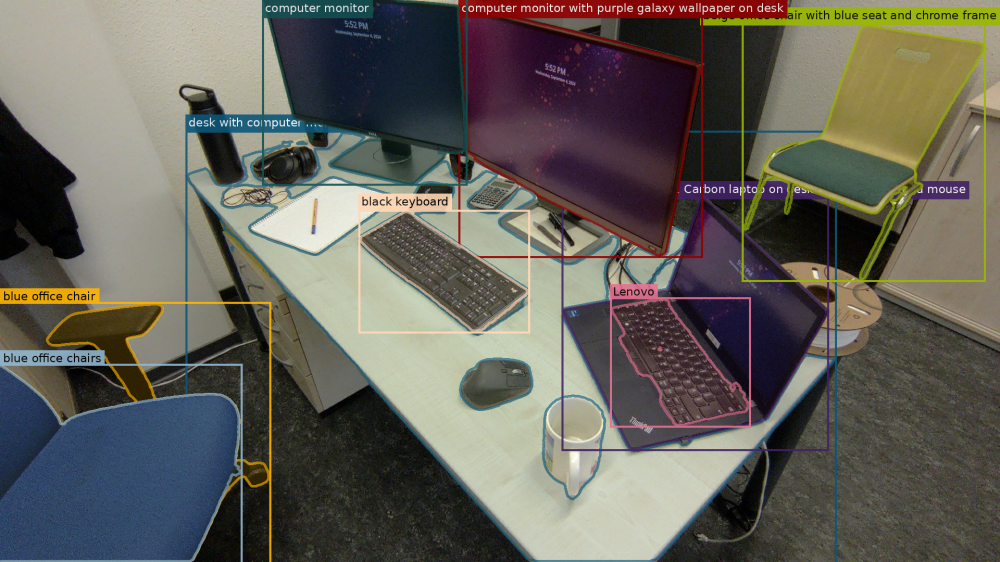

In [5]:
from nimbro_utils.imports_lazy import visualize_detections, show_image
visualizations = [visualize_detections(image=images[i], boxes=bboxes[i], masks=masks[i], labels=[f"{labels[i][j]}" for j in range(len(labels[i]))], box_format="xyxy_absolute") for i in range(len(images))]
for i in range(len(images)):
    print(f"{images[i]}:")
    show_image(visualizations[i], width=1000)

In [6]:
executor.shutdown()
node.destroy_node()
context.shutdown()
del executor, node, context, thread